# Data Analysis from Quarterly Reporting from Year 1 of CCC Maker

## Introduction:

### This is the first of two reports using only the emerical imformation from the 4 quarterly reports colleges submitted. The reports were downloaded from SmartSheet in CSV form and the process below creates python dataframes which are manipulated to group by college and/or quarter to calculate simple sum and mean values. The "Trends" section below is an attempt to show, if any, linear correlation to aggregated metrics of colleges. Focus should be placed on the charts below and the text boxes for conclusions. 

## Goals:
### 1. Provide comparative study of college overall outcomes
### 2. Understand any correlations of activities and results
### 3. Parameterize outcomes for planning of Year 2

In [1]:
import pandas as pd
import boto3
import json
internships = pd.read_csv("1.0 Internships - CCC Maker Quarterly Report.csv")
makerspace = pd.read_csv("2.0 Makerspace - CCC Maker Quarterly Report.csv")
community = pd.read_csv("3.0 CoP - CCC Maker Quarterly Report.csv")
curriculum = pd.read_csv("4.0 Curriculum - CCC Maker Quarterly Report.csv")

In [2]:
#internships.head()
print (internships.shape)
#makerspace.head()
print (makerspace.shape)
#community.head()
print (community.shape)
#curriculum.head()
print (curriculum.shape)

(96, 14)
(96, 13)
(96, 16)
(96, 11)


In [3]:
internships.isnull().sum()

Created                                     0
College                                     0
Reporting Quarter                           0
Outcome                                     0
Submission By                               0
Internship Activities                       0
Internship Success                          6
Employers Recruited                         0
Students Recruited for Internships          0
Students in Pre-Placement Training          0
Internships                                 0
Hours of Employer Match                     0
Employer Match Student Internship Hours     0
Internship Links                           14
dtype: int64

In [4]:
internships['Internship Success'].fillna('-', inplace = True)

In [5]:
makerspace.isnull().sum()

Created                  0
College                  0
Reporting Quarter        0
Outcome                  0
Submission By            0
Makerspace Activities    0
Makerspace Success       2
Engagement Activities    0
Student Count            0
Total Student Hours      0
Badges                   0
Donation of Equipment    0
Makerspace Links         7
dtype: int64

In [6]:
makerspace['Makerspace Success'].fillna('-', inplace = True)

In [7]:
community.isnull().sum()

Created                                 0
College                                 0
Reporting Quarter                       0
Outcome                                 0
Submission By                           0
Community of Practice Activities        0
Community of Practice Success           0
Kumu Map Elements                       0
Kumu Map Connections                    0
Professional Development Activities     0
Blog Posts                              0
Faculty Engaged                         0
Volunteer Time                          0
Scholarships                            0
Community Members Attendance           94
CoP Links                              13
dtype: int64

In [8]:
curriculum.isnull().sum()

Created                      0
College                      0
Reporting Quarter            0
Outcome                      0
Submission By                0
Curriculum Activities        0
Curriculum Success           0
Advisory Meetings            0
Makerspace Access            0
College/District Support     0
Curriculum Links            24
dtype: int64

In [9]:
internships_qt =internships['Internships'].groupby(internships['Reporting Quarter']).sum()

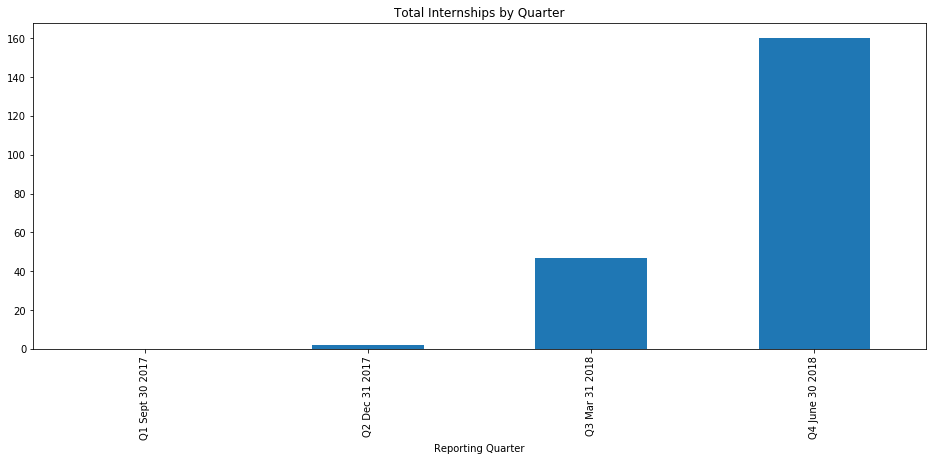

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data = internships_qt
data.plot.bar(title='Total Internships by Quarter', figsize=(16,6))

In [11]:
internships_college =internships['Internships'].groupby([internships['College'], \
                                                         internships['Reporting Quarter']]).sum()

#### Table: Internship Counts per College

In [12]:
internships_college.unstack()

Reporting Quarter,Q1 Sept 30 2017,Q2 Dec 31 2017,Q3 Mar 31 2018,Q4 June 30 2018
College,,,,
Allan Hancock College,0,2,1,0
American River College,0,0,9,9
Butte College,0,0,0,0
Cabrillo College,0,0,0,10
Chaffey College,0,0,0,0
City College of San Francisco,0,0,20,23
College of Alameda,0,0,0,26
College of San Mateo,0,0,3,0
College of the Canyons,0,0,0,10


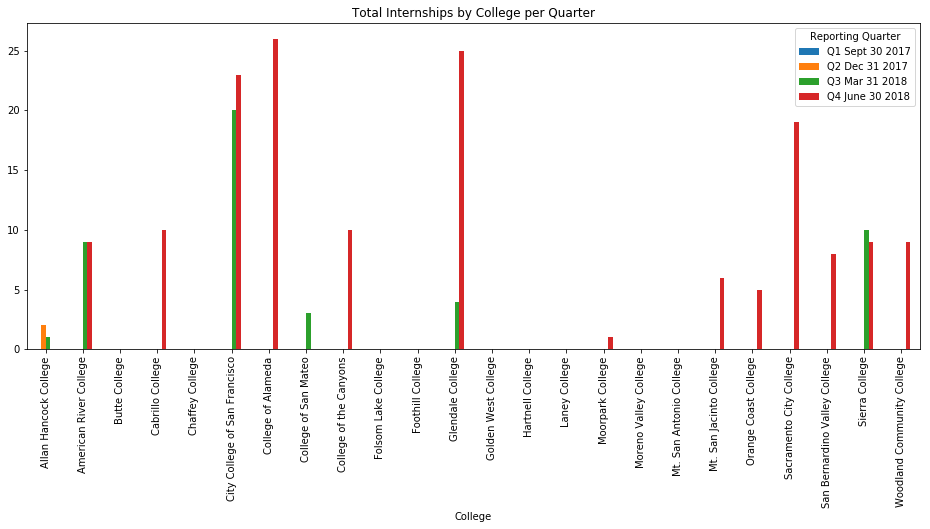

In [13]:
%matplotlib inline
data = internships_college.unstack()
data.plot.bar(title='Total Internships by College per Quarter', figsize=(16,6))

In [14]:
total_internships = internships["Internships"].sum()
print("Total Internships for Year 1 of CCC Maker = "+str(total_internships))

Total Internships for Year 1 of CCC Maker = 209


In [15]:
student_count_qt =makerspace['Student Count'].groupby(makerspace['Reporting Quarter']).sum()

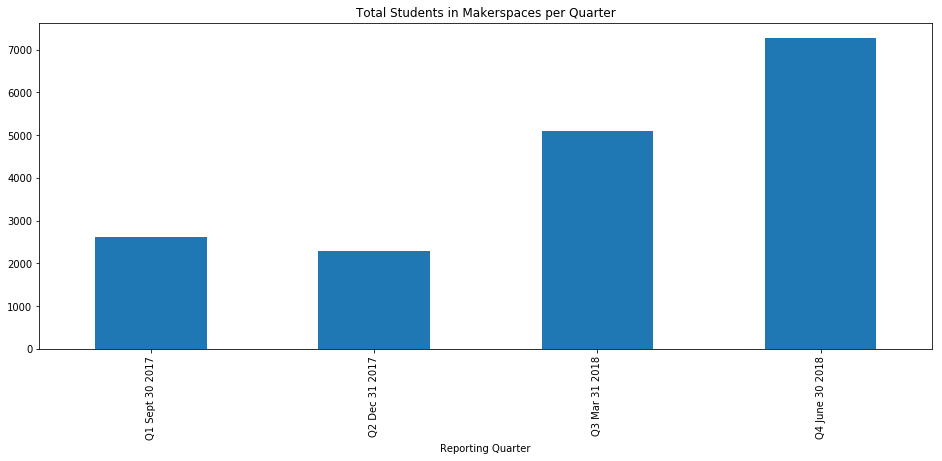

In [16]:
%matplotlib inline
data = student_count_qt
data.plot.bar(title='Total Students in Makerspaces per Quarter', figsize=(16,6))

In [17]:
student_count_college = makerspace['Student Count'].groupby([makerspace['College'], \
                                                                   makerspace['Reporting Quarter']]).sum()

#### Table: Student Engagements with Makerspace per college

In [18]:
student_count_college.unstack()

Reporting Quarter,Q1 Sept 30 2017,Q2 Dec 31 2017,Q3 Mar 31 2018,Q4 June 30 2018
College,,,,
Allan Hancock College,55,14,676,1502
American River College,50,180,75,150
Butte College,44,2,12,220
Cabrillo College,5,40,149,178
Chaffey College,0,0,0,0
City College of San Francisco,58,0,25,34
College of Alameda,0,0,104,145
College of San Mateo,60,215,159,336
College of the Canyons,230,72,132,256


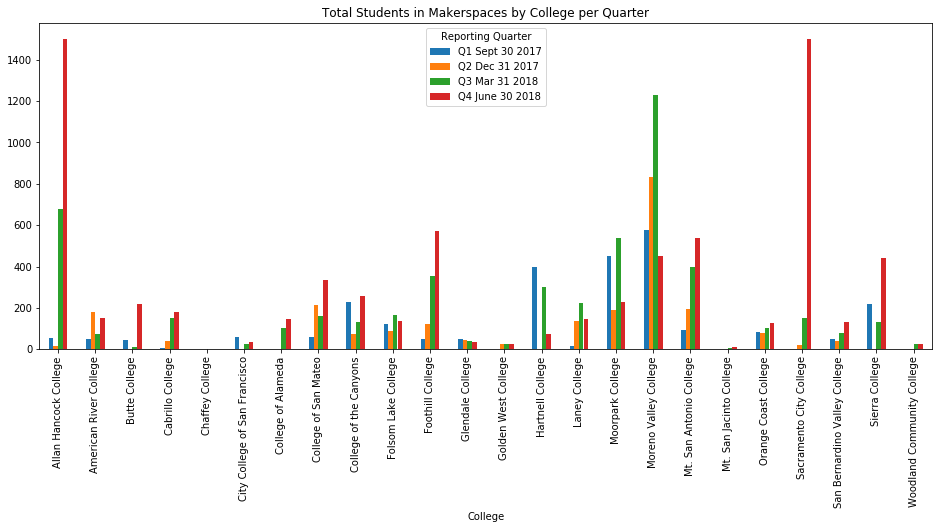

In [19]:
%matplotlib inline
data = student_count_college.unstack()
data.plot.bar(title='Total Students in Makerspaces by College per Quarter', figsize=(16,6))

In [20]:
total_student_count = makerspace['Student Count'].sum()
print('The total number of students who accessed a CCC Makersace in year 1 was '+str(total_student_count))

The total number of students who accessed a CCC Makersace in year 1 was 17284


## Student engagements:
### Colleges reported student engagements when serving students with makerspace programming in multiple capacities. Total student engagements = 17,284

In [23]:
student_hours_qt =makerspace['Total Student Hours'].groupby(makerspace['Reporting Quarter']).sum()

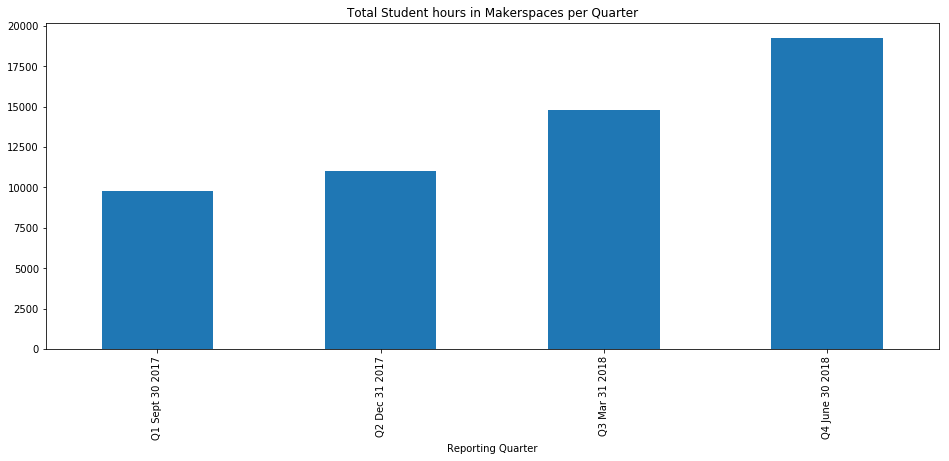

In [24]:
%matplotlib inline
data = student_hours_qt
data.plot.bar(title='Total Student hours in Makerspaces per Quarter', figsize=(16,6))

In [25]:
student_hours_college = makerspace['Total Student Hours'].groupby([makerspace['College'], \
                                                                   makerspace['Reporting Quarter']]).sum()

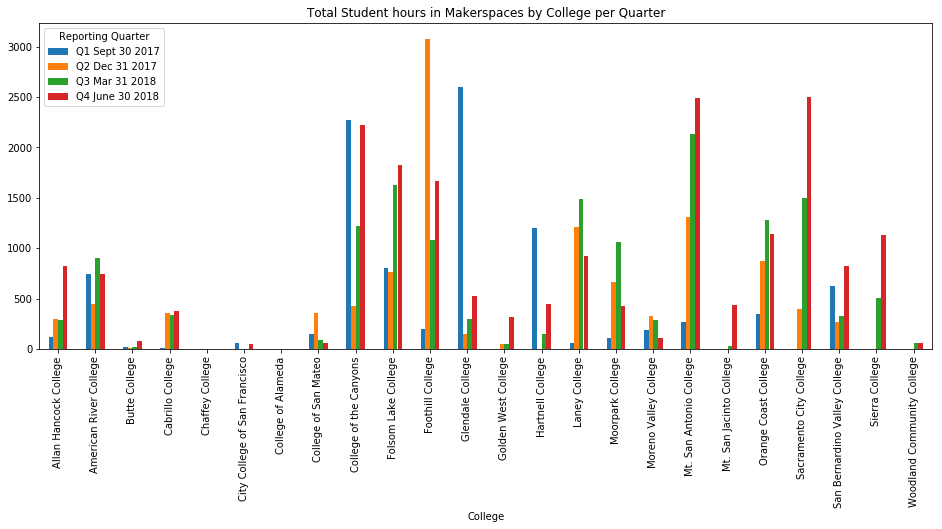

In [26]:
%matplotlib inline
data = student_hours_college.unstack()
data.plot.bar(title='Total Student hours in Makerspaces by College per Quarter', figsize=(16,6))

In [27]:
ave_student_hours_college = makerspace['Total Student Hours'].mean()
ave_student_hours_college

571.03125

In [34]:
ave_student_hours_college/4/4/5 # 4 months in a quarter, 4 weeks in a month and 5 days in a week

7.1378906249999998

In [28]:
makerspace['Ave Student Makerspace Use']=makerspace['Total Student Hours']/makerspace['Student Count']

In [29]:
ave_student_use_x_college = makerspace['Ave Student Makerspace Use'].groupby([makerspace['College'], \
                                                                    makerspace['Reporting Quarter']]).mean()

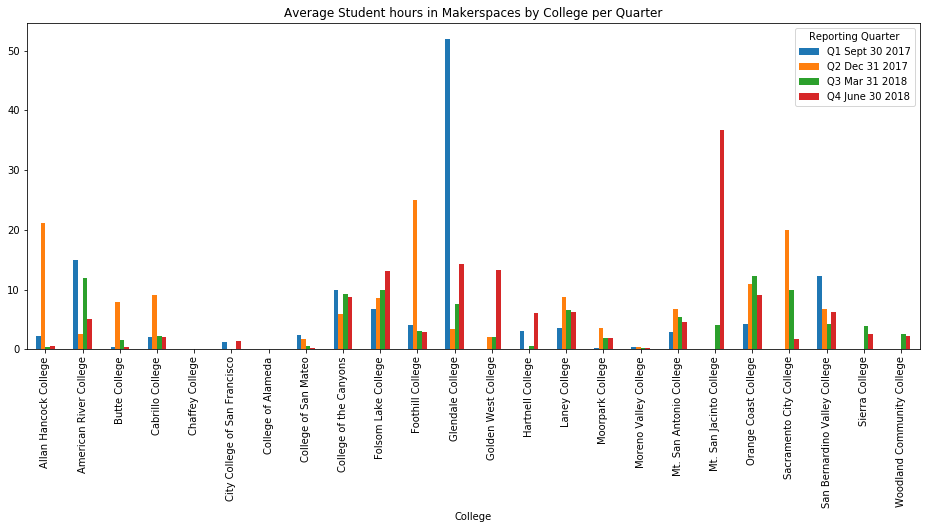

In [30]:
%matplotlib inline
data = ave_student_use_x_college.unstack()
data.plot.bar(title='Average Student hours in Makerspaces by College per Quarter', figsize=(16,6))

In [31]:
ave_student_use =makerspace['Ave Student Makerspace Use'].mean()
print('Average hourly student use of the makerspace was: '+str(ave_student_use)+' per use.')

Average hourly student use of the makerspace was: 6.25849355203 per use.


## Makerspace Use:
### Colleges on average reported makerspace usage to be 7.14 hours per day within a work week with each student logging in 6.26 hours per quarter. 

In [35]:
faculty_college = community['Faculty Engaged'].groupby([community['College'],community['Reporting Quarter']]).sum()

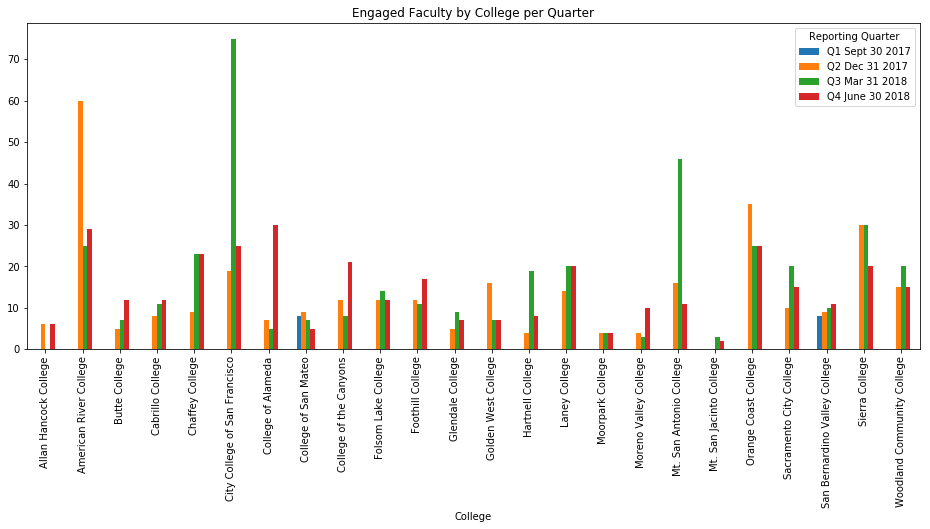

In [36]:
%matplotlib inline
data = faculty_college.unstack()
data.plot.bar(title='Engaged Faculty by College per Quarter', figsize=(16,6))

In [32]:
curriculum_college = curriculum['Makerspace Access'].groupby([curriculum['College'], \
                                                              curriculum['Reporting Quarter']]).sum()

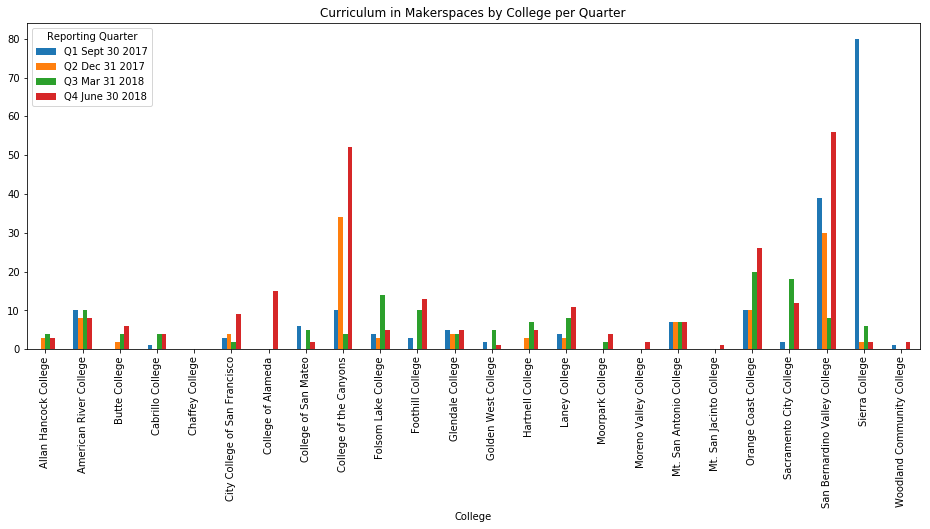

In [33]:
%matplotlib inline
data = curriculum_college.unstack()
data.plot.bar(title='Curriculum in Makerspaces by College per Quarter', figsize=(16,6))

## Trends
### Linear relationship between the metrics. 

In [41]:
total_students_x_college = makerspace['Student Count'].groupby([makerspace['College']]).sum()

In [42]:
total_internships_x_college = internships['Internships'].groupby([internships['College']]).sum()

In [43]:
total_faculty_x_college = community['Faculty Engaged'].groupby([community['College']]).sum()

In [44]:
total_curriculum_x_college = curriculum['Makerspace Access'].groupby([curriculum['College']]).sum()

In [45]:
total_employers_x_college = internships['Employers Recruited'].groupby([internships['College']]).sum()

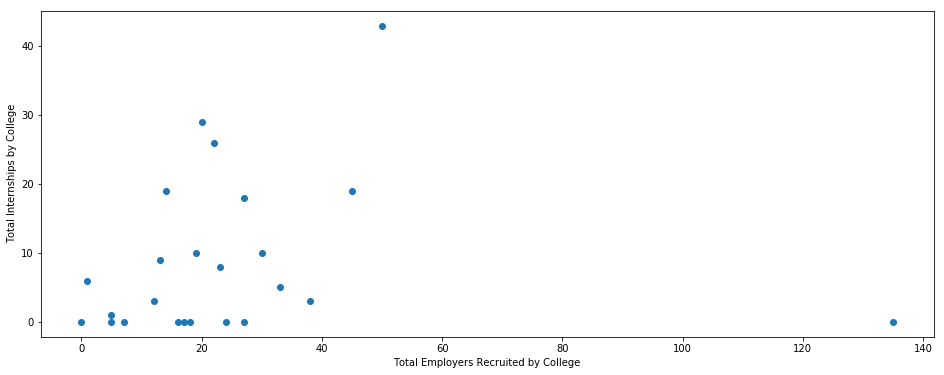

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure( figsize=(16,6) )
plt.ylabel('Total Internships by College')
plt.xlabel('Total Employers Recruited by College')
plt.scatter(total_employers_x_college, total_internships_x_college)

In [52]:
ave_employer_x_internship = total_employers_x_college.mean()/total_internships_x_college.mean()
print ('The average number of employers needed per internehip was '+str(ave_employer_x_internship))

The average number of employers needed per internehip was 2.87559808612


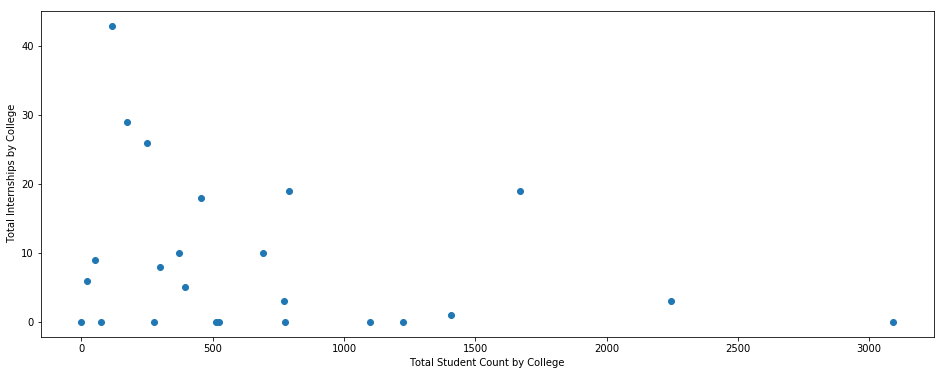

In [48]:
%matplotlib inline
plt.figure( figsize=(16,6) )
plt.ylabel('Total Internships by College')
plt.xlabel('Total Student Count by College')
plt.scatter(total_students_x_college, total_internships_x_college)

In [49]:
ave_student_x_internship = total_students_x_college.mean()/total_internships_x_college.mean()
print ('The average number of students needed per internship was '+str(ave_student_x_internship))

The average number of students needed per internship was 82.6985645933


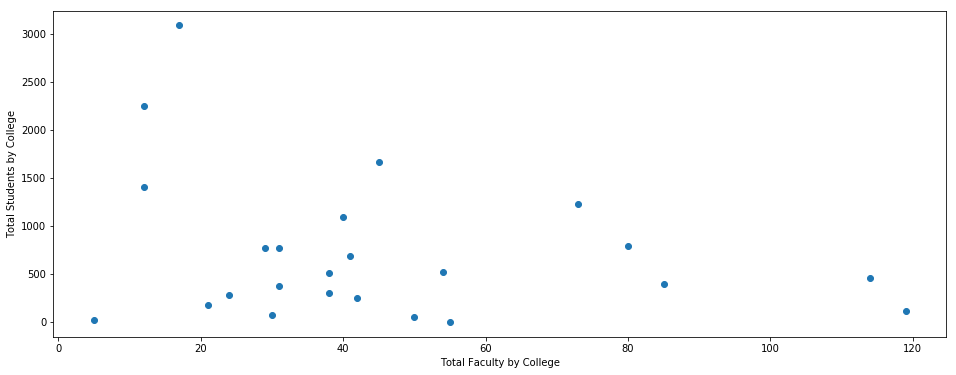

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure( figsize=(16,6) )
plt.ylabel('Total Students by College')
plt.xlabel('Total Faculty by College')
plt.scatter(total_faculty_x_college, total_students_x_college)

In [53]:
ave_student_x_faculty = total_students_x_college.mean()/total_faculty_x_college.mean()
print ('The average number of students engaged with faculty was '+str(ave_student_x_faculty))

The average number of students engaged with faculty was 15.9152854512


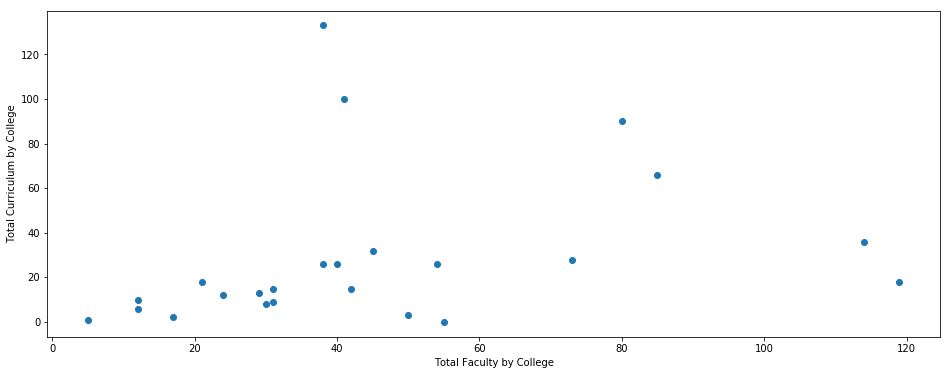

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure( figsize=(16,6) )
plt.ylabel('Total Curriculum by College')
plt.xlabel('Total Faculty by College')
plt.scatter(total_faculty_x_college, total_curriculum_x_college)

In [55]:
ave_curriculum_x_faculty = total_curriculum_x_college.mean()/total_faculty_x_college.mean()
print ('The average number of students engaged with faculty was '+str(ave_curriculum_x_faculty))

The average number of students engaged with faculty was 0.638121546961


In [57]:
ave_student_x_internship*ave_student_use/4/4/5 #number of hours dedicated to create one internship

6.469605415868477

# Analysis

#### An important take away for planning purposes was the need to recruit at least 3 employers per internship completed. This value along with the need to engage approximately 83 students to successfully create that one internship creates a work volume calculated by the average student quarterly use of makerspaces yielding an average of 6.5 hours a day of general student makerspace use per internship placed.

#### Faculty play an important and growing part of the development of makerspace integration. On average each faculty represents 16 student engagements within a makerspace. Considering this is less than an average lab class, this value is expected to grow as faculty maybe preparing for future classes and upskilling themselves. 

#### There was less than one curriculum piece developed per faculty indicating co-development of curriculum or faculty becoming trained in makerspace integration without developing any curriculum during year 1. Again, this value is expected to grow as faculty maybe preparing for future classes and upskilling themselves.